In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

## Step 1: Lade den Diabetes Datensatz mit `load_diabetes()` in die Variable `diabetes`

Achte darauf, den Datensatz als `DataFrame` zu laden

Nutze `scaled=False`, damit wir selbst den Effekt der Skalierung testen können!

In [13]:
?datasets.load_diabetes

Signature: datasets.load_diabetes(*, return_X_y=False, as_frame=False, scaled=True)
Docstring:
Load and return the diabetes dataset (regression).

==============   ==================
Samples total    442
Dimensionality   10
Features         real, -.2 < x < .2
Targets          integer 25 - 346
==============   ==================

.. note::
   The meaning of each feature (i.e. `feature_names`) might be unclear
   (especially for `ltg`) as the documentation of the original dataset is
   not explicit. We provide information that seems correct in regard with
   the scientific literature in this field of research.

Read more in the :ref:`User Guide <diabetes_dataset>`.

Parameters
----------
return_X_y : bool, default=False
    If True, returns ``(data, target)`` instead of a Bunch object.
    See below for more information about the `data` and `target` object.

    .. versionadded:: 0.18

as_frame : bool, default=False
    If True, the data is a pandas DataFrame including columns with
    a

In [23]:
diabetes = datasets.load_diabetes(as_frame=True, scaled=False)

In [5]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

## Step 2: Gib die Beschreibung des Datensatzes aus

In [15]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

## Step 3: Speichere die Features in `X` und das target in `y`

In [24]:
X = diabetes.data
y = diabetes.target

## Step 4: Überprüfe die Dimension von `X` und `y` sowie die Datentypen von `X`

In [25]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0
...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0


In [17]:
# Mache daraus ne Klassifikation
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [18]:
X.shape, y.shape

((442, 10), (442,))

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [29]:
X.dtypes

age     float64
sex    category
bmi     float64
bp      float64
s1      float64
s2      float64
s3      float64
s4      float64
s5      float64
s6      float64
dtype: object

## Step 5: Wandle den Datentyp der Variable `sex` in `category` um

In [28]:
X["sex"] = X["sex"].astype("category")

/var/folders/27/_w012g5n1c55m7kh9r8jyn488xbh04/T/ipykernel_13992/2497191661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["sex"] = X["sex"].astype("category")


## Step 6: Überprüfe die Wertebereiche aller Features auf mögliche Ausreißer (`describe()`)

In [30]:
X.describe()

,age,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181
std,13.109028,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335
min,19.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000
25%,38.250000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000
50%,50.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000
75%,59.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000
max,79.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000


In [32]:
X.describe(include="category")

,sex
count,442.0
unique,2.0
top,1.0
freq,235.0


## Step 7: Wie sieht die Altersverteilung und BMI-Verteilung im Datensatz aus? (Histogramm)

Erstelle die Grafiken jeweils mit und ohne Unterscheidung nach dem Geschlecht

<AxesSubplot:ylabel='Frequency'>

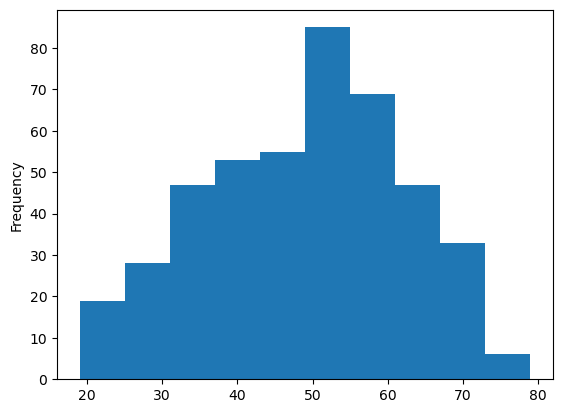

In [34]:
X["age"].plot(kind="hist")

<AxesSubplot:xlabel='age', ylabel='Count'>

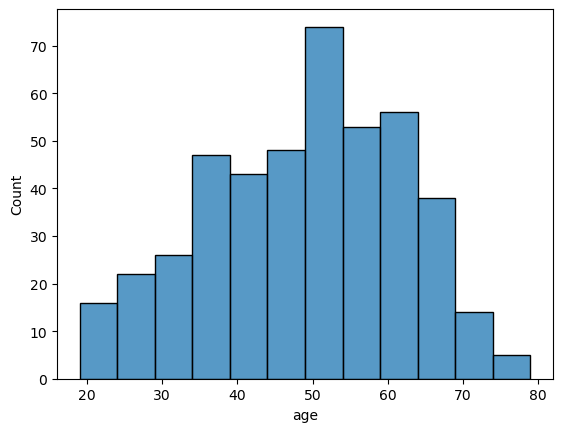

In [68]:
sns.histplot(data=X, x="age")

<AxesSubplot:xlabel='age', ylabel='Count'>

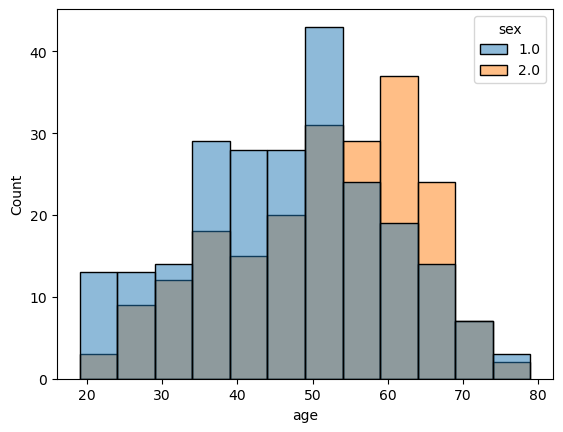

In [83]:
sns.histplot(data=X, x="age", hue="sex")

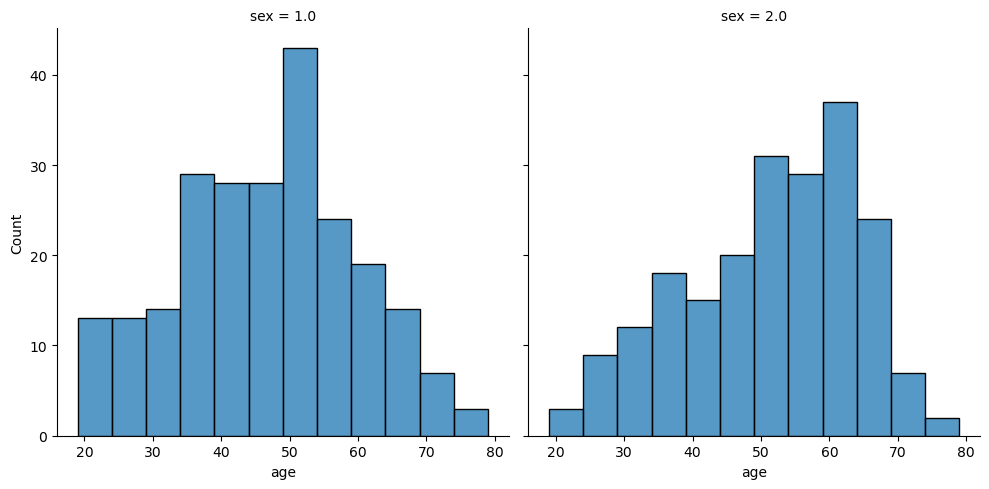

In [80]:
sns.displot(data=X, x="age", col="sex")

<AxesSubplot:xlabel='bmi', ylabel='Count'>

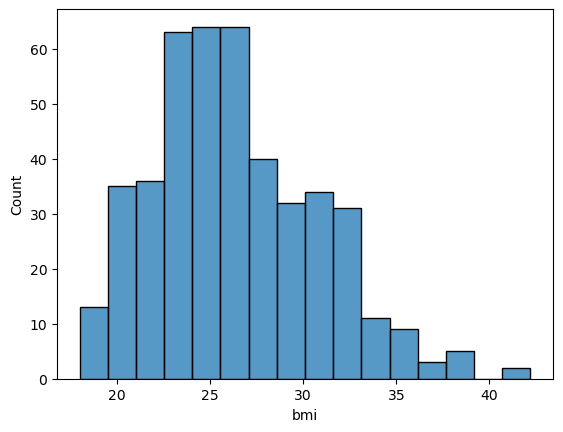

In [82]:
sns.histplot(data=X, x="bmi")

<AxesSubplot:xlabel='bmi', ylabel='Count'>

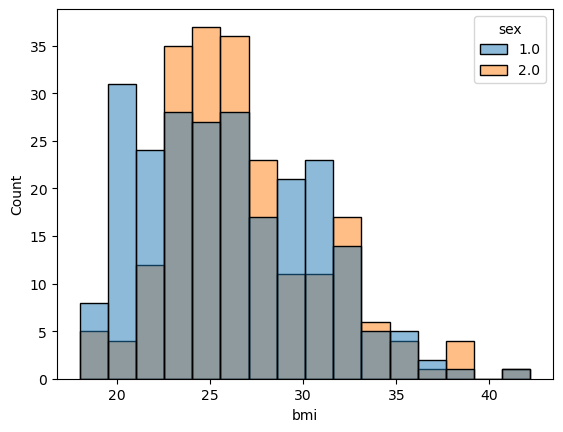

In [84]:
sns.histplot(data=X, x="bmi", hue="sex")

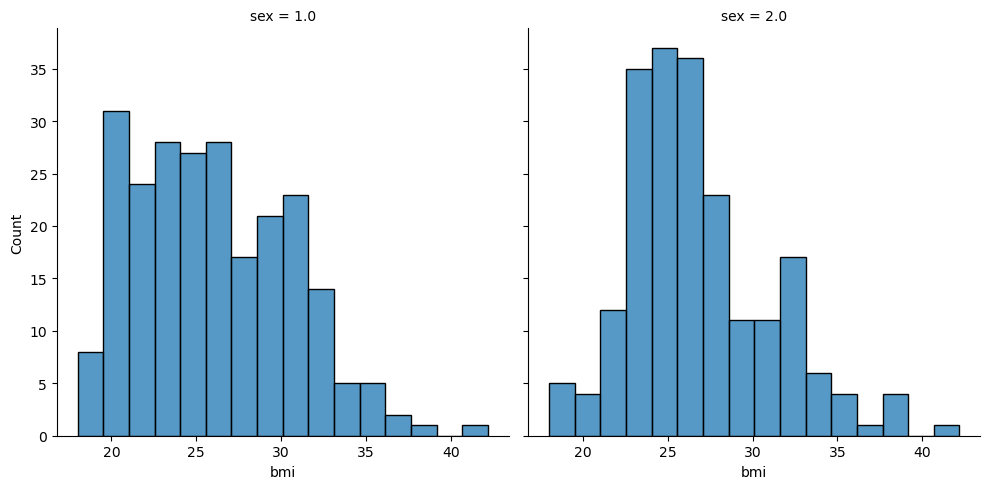

In [81]:
sns.displot(data=X, x="bmi", col="sex")

## Step 8: Wie sieht die Geschlechtsverteilung im Datensatz aus?

In [37]:
X.sex.value_counts()

1.0    235
2.0    207
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

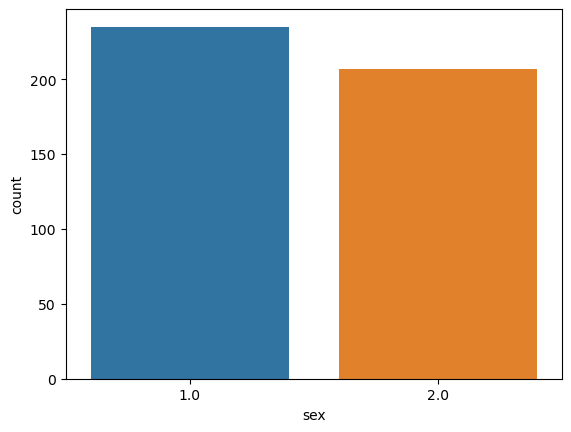

In [86]:
sns.countplot(data=X, x="sex")

## Step 9: Bestimme die Korrelation zwischen den Features und dem Target (`.corrwith()`)

In [38]:
X.corr()

,age,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
bmi,0.185085,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


In [43]:
X.corrwith(y, method="spearman").sort_values()

s3    -0.410022
s2     0.195834
age    0.197822
s1     0.232429
s6     0.350792
bp     0.416241
s4     0.448931
bmi    0.561382
s5     0.589416
dtype: float64

In [44]:
X.corrwith(y, method="pearson").sort_values()

s3    -0.394789
s2     0.174054
age    0.187889
s1     0.212022
s6     0.382483
s4     0.430453
bp     0.441482
s5     0.565883
bmi    0.586450
dtype: float64

## Step 10: Wiederhole die Analyse aus Schritt 6, getrennt nach Geschlecht

Welche Gemeinsamkeiten und welche Unterschiede gibt es?

In [88]:
X[X.sex==1].corrwith(y).sort_values()

s3    -0.462404
age    0.130900
s1     0.207279
s2     0.217583
s6     0.349445
bp     0.378893
s4     0.488631
bmi    0.531892
s5     0.549028
dtype: float64

In [89]:
X[X.sex==2].corrwith(y).sort_values()

s3    -0.344755
s2     0.121138
s1     0.214555
age    0.243154
s4     0.394604
s6     0.419677
bp     0.528116
s5     0.585156
bmi    0.651529
dtype: float64

## Step 11: Stelle die Korrelationen für jedes Geschlecht als Balkendiagramm dar

In [100]:
male_corr = pd.DataFrame(X[X.sex==1].corrwith(y).sort_values())
female_corr = pd.DataFrame(X[X.sex==2].corrwith(y).sort_values())

data_corr = pd.concat([male_corr, female_corr])
data_corr.columns = ["corr"]
data_corr["sex"] = ["male"] * len(male_corr) + ["female"] * len(female_corr)

In [101]:
data_corr

,corr,sex
s3,-0.462404,male
age,0.130900,male
s1,0.207279,male
s2,0.217583,male
s6,0.349445,male
bp,0.378893,male
s4,0.488631,male
bmi,0.531892,male
s5,0.549028,male
s3,-0.344755,female


<AxesSubplot:ylabel='corr'>

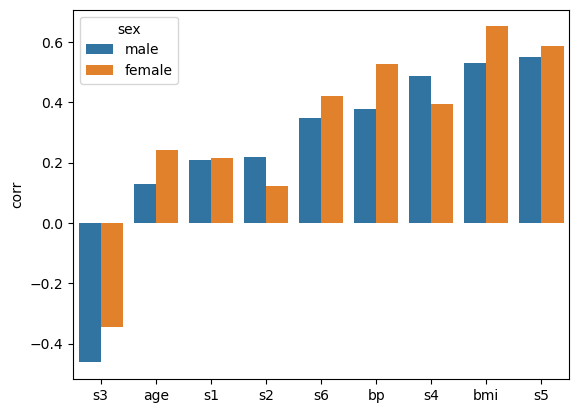

In [105]:
sns.barplot(data=data_corr, x=data_corr.index, y="corr", hue="sex")

## Step 12: Erstelle eine Scatterplotmatrix für den Datensatz mit den 5 höchstkorrelierten Features (`sns.pairplot`)

https://seaborn.pydata.org/examples/scatterplot_matrix.html

In [108]:
data_corr = pd.concat([X,y], axis=1)

In [50]:
X.corrwith(y).abs().sort_values(ascending=False).head(5).index.to_list()

['bmi', 's5', 'bp', 's4', 's3']

In [119]:
features = X.corrwith(y).abs().sort_values(ascending=False).head(5).index.to_list()
features.append(y.name)

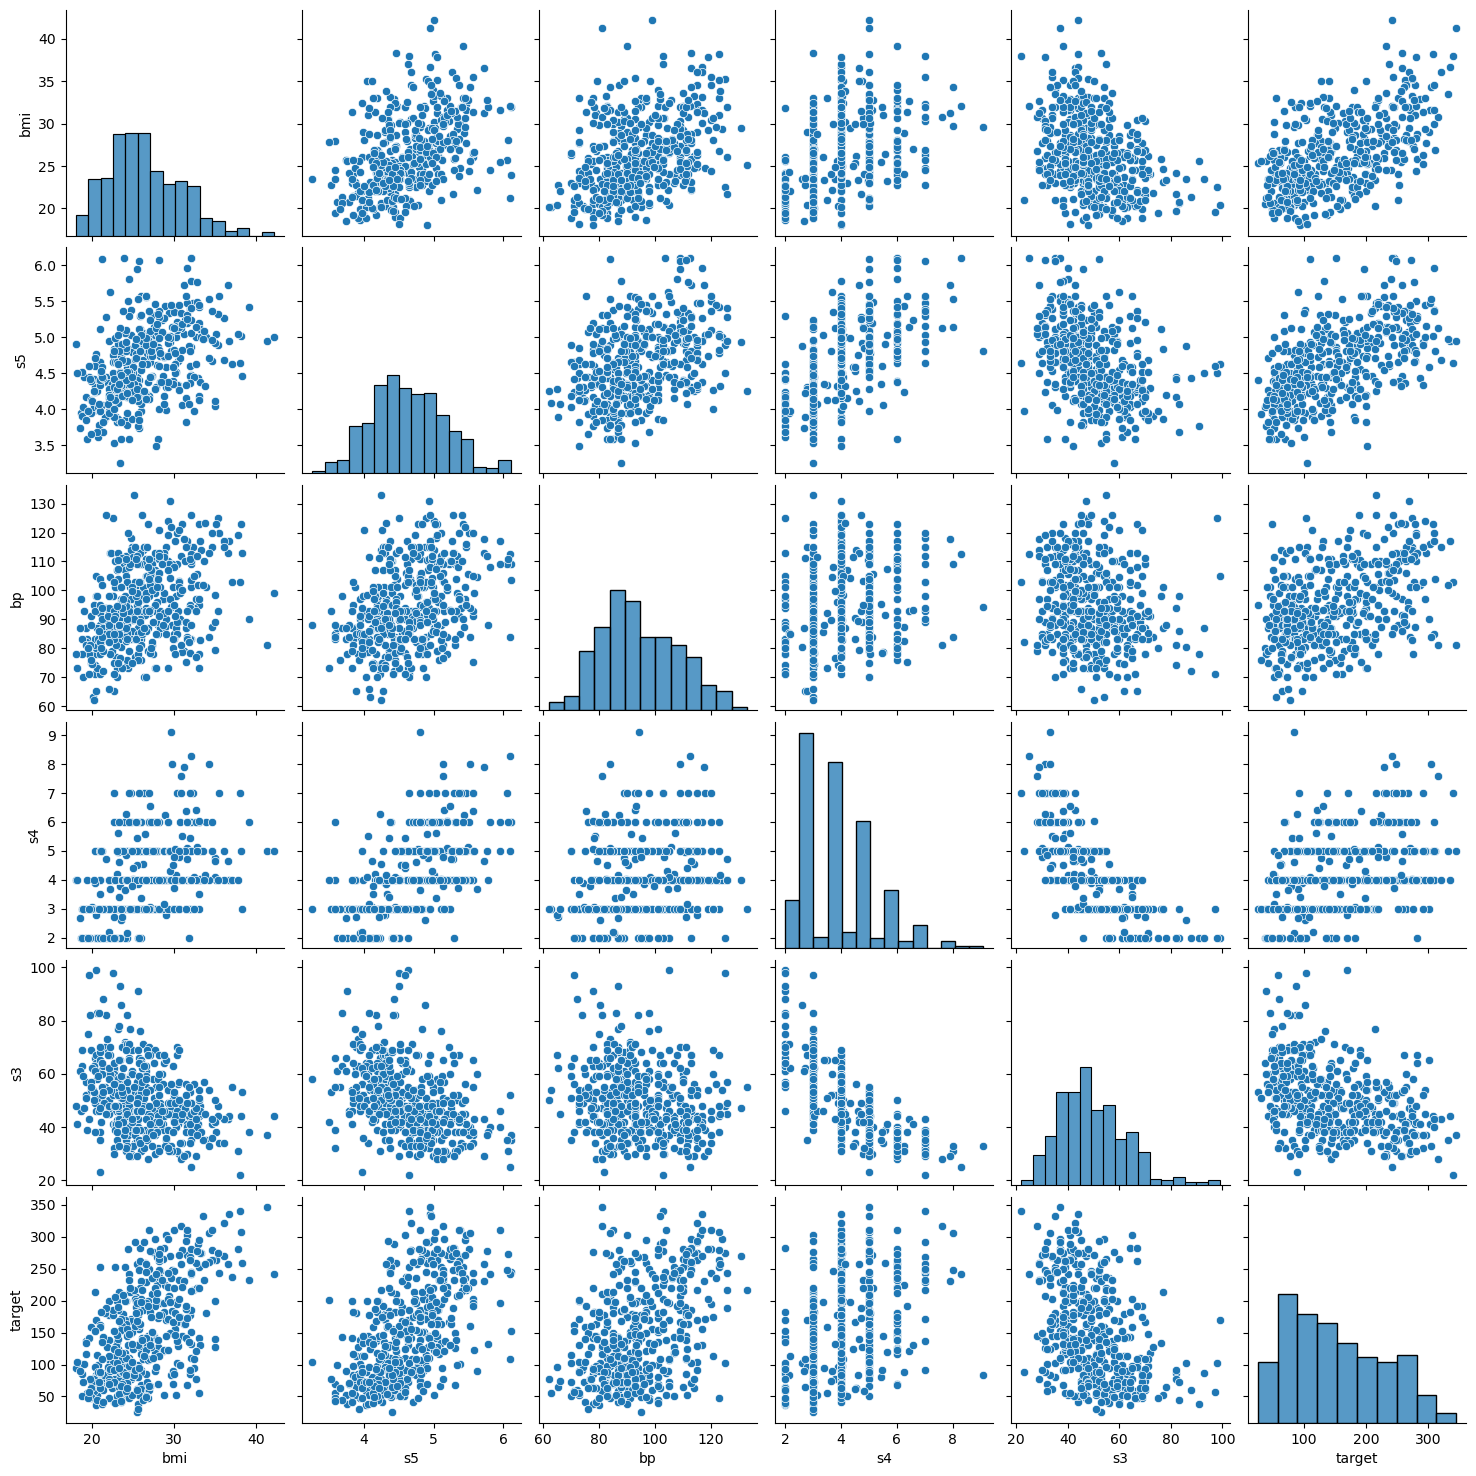

In [120]:
sns.pairplot(data_corr[features])

## Step 13: Erstelle einen Trainings- und Testdatensatz

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

## Step 14: Wähle ein lineares Modell und trainiere es

https://scikit-learn.org/stable/modules/linear_model.html

In [56]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Step 15: Bewerte das Modell auf dem Testdatensatz einmal mit `score()` und einmal mit der `mean_squared_error` Metrik

In [57]:
model.score(X_test, y_test) # R^2

0.5001831694440828

In [58]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
mse = mean_squared_error(predictions, y_test)
print("MSE:", mse)
print("RMSE:", np.sqrt(mse))

MSE: 3107.30684315284
RMSE: 55.74322239656441


## Step 16: Wiederhole Schritt 14 und 15, einmal mit Normalisierung und einmal mit Standardisierung. Was fällt auf?

In [59]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
X_train_trans = scaler.fit_transform(X_train)
X_test_trans = scaler.transform(X_test)

model = LinearRegression()
print(f"Training a {model.__class__.__name__} ...")

model.fit(X_train_trans, y_train)
score = model.score(X_test_trans, y_test)
print("Score:", score)

predictions = model.predict(X_test_trans)
mse = mean_squared_error(predictions, y_test)
print("MSE:", mse)
print("RMSE:", np.sqrt(mse))


Training a LinearRegression ...
Score: 0.5001831694440837
MSE: 3107.3068431528345
RMSE: 55.74322239656436


In [60]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
X_train_trans = scaler.fit_transform(X_train)
X_test_trans = scaler.transform(X_test)

model = LinearRegression()
print(f"Training a {model.__class__.__name__} ...")

model.fit(X_train_trans, y_train)
score = model.score(X_test_trans, y_test)
print("Score:", score)

predictions = model.predict(X_test_trans)
mse = mean_squared_error(predictions, y_test)
print("MSE:", mse)
print("RMSE:", np.sqrt(mse))


Training a LinearRegression ...
Score: 0.5001831694440838
MSE: 3107.3068431528336
RMSE: 55.74322239656435


## Step 17: Schreibe eine Funktion, die ein Modell, die Trainings- und Testdaten und optional einen Transformer bekommt und das Training durchführt

In [61]:
def train(model, X_train, y_train, X_test, y_test, transformer = None):
    if transformer:
        print("Mit Transformer:", transformer.__class__.__name__)
        X_train = transformer.fit_transform(X_train)
        X_test = transformer.transform(X_test)
    
    print(f"Training a {model.__class__.__name__} ...")
    
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print("Score:", score)
    
    predictions = model.predict(X_test)
    mse = mean_squared_error(predictions, y_test)
    print("MSE:", mse)
    print("RMSE:", np.sqrt(mse))
    print()

In [62]:
train(LinearRegression(), X_train, y_train, X_test, y_test, StandardScaler())

Mit Transformer: StandardScaler
Training a LinearRegression ...
Score: 0.5001831694440838
MSE: 3107.3068431528336
RMSE: 55.74322239656435



## Step 18: Teste deine Funktion mit anderen Regressionsmodellen, jeweils mit und ohne Standardisierung

https://scikit-learn.org/stable/supervised_learning.html

In [63]:
from sklearn.linear_model import Ridge, Lasso

model = Ridge()
train(model, X_train, y_train, X_test, y_test)
train(model, X_train, y_train, X_test, y_test, StandardScaler())

model = Lasso()
train(model, X_train, y_train, X_test, y_test)
train(model, X_train, y_train, X_test, y_test, StandardScaler())

Training a Ridge ...
Score: 0.4984749906854612
MSE: 3117.9264046031603
RMSE: 55.83839543363653

Mit Transformer: StandardScaler
Training a Ridge ...
Score: 0.49866639804412805
MSE: 3116.736445884176
RMSE: 55.82773903611157

Training a Lasso ...
Score: 0.48765135043161034
MSE: 3185.21579818202
RMSE: 56.437716096436965

Mit Transformer: StandardScaler
Training a Lasso ...
Score: 0.5010935519963842
MSE: 3101.647093897284
RMSE: 55.69243300393047



In [64]:
from sklearn.svm import SVR

model = SVR(kernel="linear")
train(model, X_train, y_train, X_test, y_test)
train(model, X_train, y_train, X_test, y_test, StandardScaler())

model = SVR(kernel="rbf")
train(model, X_train, y_train, X_test, y_test)
train(model, X_train, y_train, X_test, y_test, StandardScaler())

model = SVR(kernel="poly", degree=3)
train(model, X_train, y_train, X_test, y_test)
train(model, X_train, y_train, X_test, y_test, StandardScaler())

Training a SVR ...
Score: 0.46216998122848085
MSE: 3343.630697515687
RMSE: 57.82413594266401

Mit Transformer: StandardScaler
Training a SVR ...
Score: 0.5044498007232023
MSE: 3080.781660805394
RMSE: 55.50478953032246

Training a SVR ...
Score: 0.041091103622480474
MSE: 5961.432255812476
RMSE: 77.21031184895237

Mit Transformer: StandardScaler
Training a SVR ...
Score: 0.1600896902474932
MSE: 5221.630992749466
RMSE: 72.26085380584335

Training a SVR ...
Score: 0.20733802597338646
MSE: 4927.893231327233
RMSE: 70.1989546312994

Mit Transformer: StandardScaler
Training a SVR ...
Score: 0.274498860670206
MSE: 4510.361630774344
RMSE: 67.1592259542525



In [66]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_features=3)
train(model, X_train, y_train, X_test, y_test)
train(model, X_train, y_train, X_test, y_test, StandardScaler())

model = DecisionTreeRegressor(max_depth=10, max_features=3)
train(model, X_train, y_train, X_test, y_test)
train(model, X_train, y_train, X_test, y_test, StandardScaler())

Training a DecisionTreeRegressor ...
Score: -0.06163595306046754
MSE: 6600.075187969925
RMSE: 81.24084679500777

Mit Transformer: StandardScaler
Training a DecisionTreeRegressor ...
Score: -0.06134085597505412
MSE: 6598.2406015037595
RMSE: 81.22955497541372

Training a DecisionTreeRegressor ...
Score: 0.133492766155051
MSE: 5386.981175430072
RMSE: 73.39605694742785

Mit Transformer: StandardScaler
Training a DecisionTreeRegressor ...
Score: 0.1387938009009584
MSE: 5354.025219298246
RMSE: 73.17120485066681



In [67]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
train(model, X_train, y_train, X_test, y_test)
train(model, X_train, y_train, X_test, y_test, StandardScaler())

model = RandomForestRegressor(n_estimators=200, max_depth=6, max_features=4)
train(model, X_train, y_train, X_test, y_test)
train(model, X_train, y_train, X_test, y_test, StandardScaler())

Training a RandomForestRegressor ...
Score: 0.5065785966134873
MSE: 3067.5471684210524
RMSE: 55.38544184549811

Mit Transformer: StandardScaler
Training a RandomForestRegressor ...
Score: 0.4912600002393367
MSE: 3162.781215037594
RMSE: 56.23860964708848

Training a RandomForestRegressor ...
Score: 0.5121552413046768
MSE: 3032.8777752525752
RMSE: 55.07156957317065

Mit Transformer: StandardScaler
Training a RandomForestRegressor ...
Score: 0.5101114767444357
MSE: 3045.583637111543
RMSE: 55.186806730517965



## Exkurs: Modell nach Geschlecht

In [74]:
X_train_male = X_train.query("sex == 1")
X_test_male = X_test.query("sex == 1")

In [76]:
y_train_male = y_train[X_train_male.index]
y_test_male = y_test[X_test_male.index]

In [77]:
model = LinearRegression()
train(model, X_train_male, y_train_male, X_test_male, y_test_male)
train(model, X_train_male, y_train_male, X_test_male, y_test_male, StandardScaler())

Training a LinearRegression ...
Score: 0.4560395558647523
MSE: 2927.6453721130515
RMSE: 54.10772007868241

Mit Transformer: StandardScaler
Training a LinearRegression ...
Score: 0.45603955586475287
MSE: 2927.6453721130492
RMSE: 54.10772007868239



In [78]:
X_train_female = X_train.query("sex == 2")
X_test_female = X_test.query("sex == 2")
y_train_female = y_train[X_train_female.index]
y_test_female = y_test[X_test_female.index]

model = LinearRegression()
train(model, X_train_female, y_train_female, X_test_female, y_test_female)
train(model, X_train_female, y_train_female, X_test_female, y_test_female, StandardScaler())

Training a LinearRegression ...
Score: 0.5383327199353892
MSE: 3132.975652396194
RMSE: 55.97299038282834

Mit Transformer: StandardScaler
Training a LinearRegression ...
Score: 0.5383327199353888
MSE: 3132.975652396197
RMSE: 55.972990382828364



## Step 19: Gib die Koeffizienten des linearen Modells aus und visualisiere sie. Was fällt auf, wenn wir die Koeffizienten mit den Werten aus der Korrelationsanalyse vergleichen?

Hat ein StandardScaler EInfluss auf diese Auswertung?

In [88]:
model = LinearRegression()
train(model, X_train, y_train, X_test, y_test, StandardScaler())

Mit Transformer: StandardScaler
Training a LinearRegression ...
Score: 0.5001831694440838
MSE: 3107.3068431528336
RMSE: 55.74322239656435



In [89]:
model.coef_

array([  1.94206346, -14.4381076 ,  23.3467417 ,  18.27177704,
       -21.53594663,   9.67116944,  -3.7490027 ,   2.98302591,
        29.92652347,   2.08437408])

<AxesSubplot:>

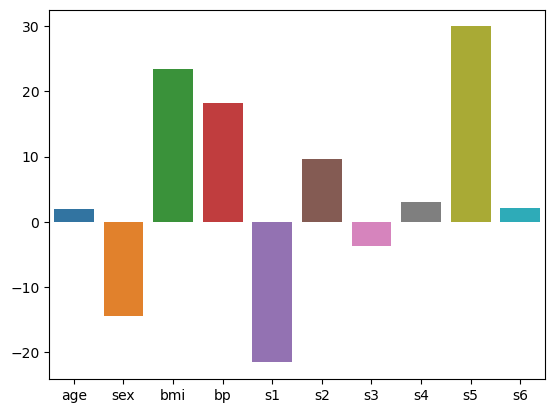

In [90]:
sns.barplot(x=X_train.columns, y=model.coef_)

## Step 20: Visualisiere Vorhersagen

In [92]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [94]:
predictions

array([104.41452743, 107.06776308, 156.53520542, 217.75532174,
       195.13502225,  91.7716307 , 147.43085455, 108.61800132,
       157.69183002, 112.06674092, 117.33551786,  79.9245951 ,
       181.23925903, 196.68898968, 189.42265189, 250.12320604,
       147.03679801, 128.70018997, 106.39345887, 200.44523976,
        45.5652562 , 155.05398767, 110.70882136, 125.8339517 ,
       129.43727083, 156.99478616, 152.76701081,  85.52750144,
       167.70043832, 123.84480641, 138.96211862, 171.39705249,
       143.01478768,  59.5790541 , 208.18686293, 185.78772882,
        74.47395793, 187.77274125, 183.44998108, 107.46776435,
        86.3259965 , 100.4135089 , 256.18586181, 245.10971327,
        59.85149543, 162.05988013, 244.02002727, 146.36112648,
       123.45277669, 114.8443383 , 109.72100306, 148.8322477 ,
       136.17517844, 130.70420924, 143.45400853, 139.29079334,
       115.27784729, 158.74562339, 112.1218647 , 194.12010406,
       161.42846667, 170.53983379, 133.05248899,  87.65

In [95]:
y_test

297     31.0
214     65.0
222    252.0
408    189.0
316    220.0
       ...  
38     252.0
263    116.0
206    196.0
301     65.0
413    113.0
Name: target, Length: 133, dtype: float64

(0.0, 400.0)

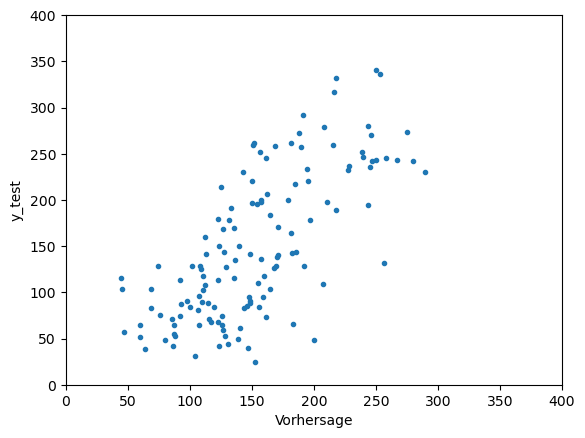

In [102]:
plt.plot(predictions, y_test, ".")
plt.xlabel("Vorhersage")
plt.ylabel("y_test")
#plt.axis("equal")
plt.xlim([0, 400])
plt.ylim([0, 400])

In [106]:
model = LinearRegression()
model.fit(X_train[["s5"]], y_train)

LinearRegression()

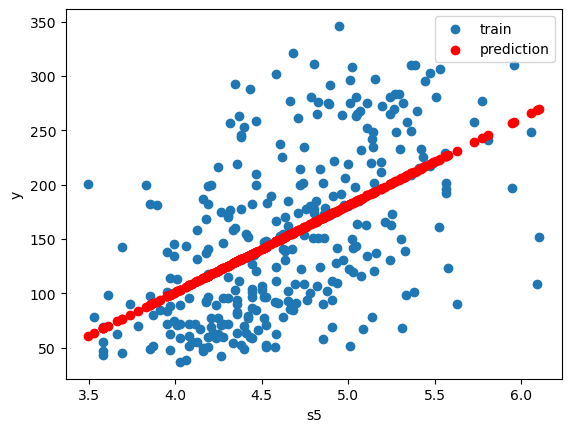

In [111]:
plt.scatter(X_train["s5"], y_train, label="train")
plt.xlabel("s5")
plt.ylabel("y")
predictions = model.predict(X_train[["s5"]])
plt.scatter(X_train["s5"], predictions, color="red", label="prediction")
plt.legend()